# A comparative analysis of machine learning algorithms for heart disease prediction

# 1. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'final dicision tree.png', 'heart_disease_data.csv', 'Heart_Disease_Prediction_ML.ipynb']


# 2. Importing and undeerstanding our dataset

In [3]:
data = pd.read_csv("heart_disease_data.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(303, 14)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Dataset Information(14 attributes)
1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [12]:
data.sample(69)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.isnull().sum().sum()
# 0 indicates no missing values

0

In [15]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# 3. Exploratory Data Analysis(EDA)

1    165
0    138
Name: target, dtype: int64


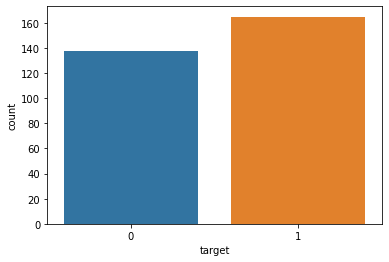

In [6]:
y = data["target"]
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [18]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [7]:
data["sex"].unique()

array([1, 0], dtype=int64)

In [8]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patinets:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patinets:31.68%
Percentage of Male Patients:68.32%


<AxesSubplot:xlabel='sex', ylabel='target'>

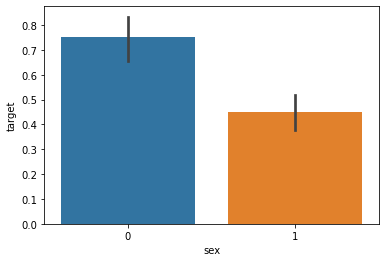

In [10]:
sns.barplot(data["sex"],y)

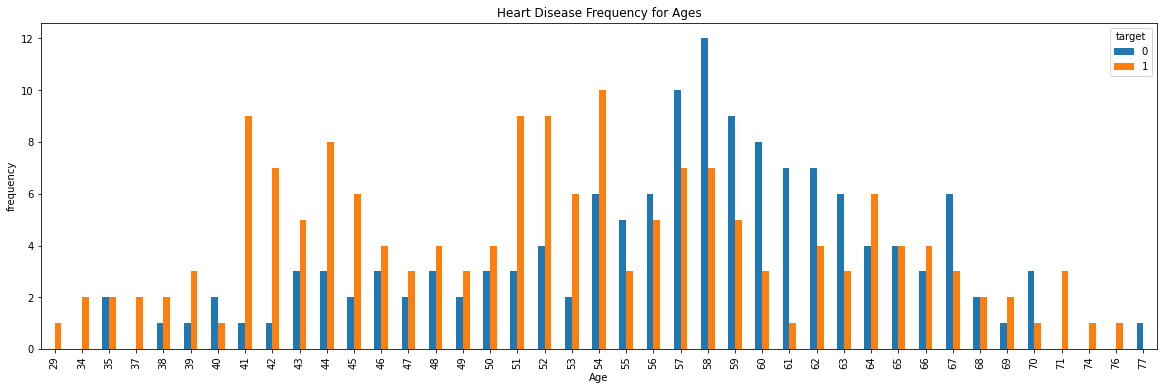

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",fightsize=(20,10),color=['blue','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["Don't have Disease","Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [14]:
data.coloumns = ['age','sex','chest_pain_type','resting_blood_pressure','cholestrol',
                 'fasting_blood_sugar','rest_ecg','max_heart_rate_achieved',
                 'exercise_induced_angina','st_depression','st_slope','num_major_vessels',
                 'thalassenia','target']

In [17]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

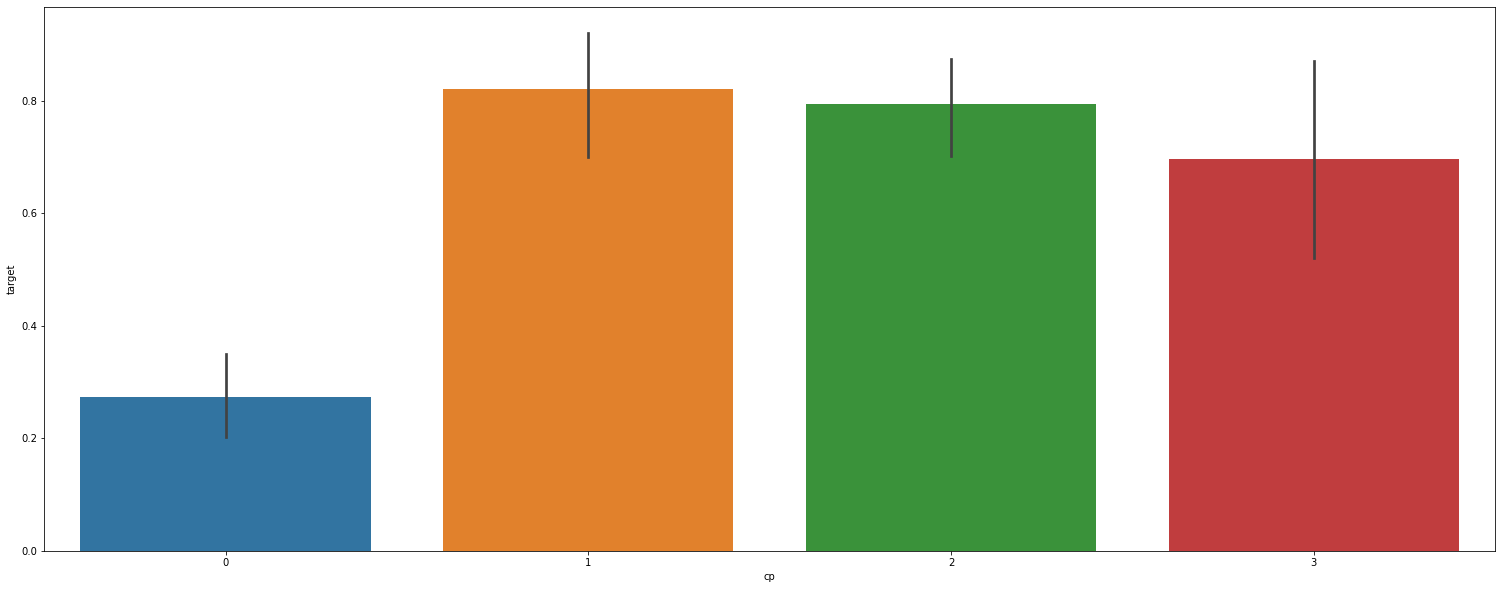

In [18]:
plt.figure(figsize=(26,10))
sns.barplot(data["cp"],y)

In [19]:
data["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

<AxesSubplot:xlabel='trestbps', ylabel='target'>

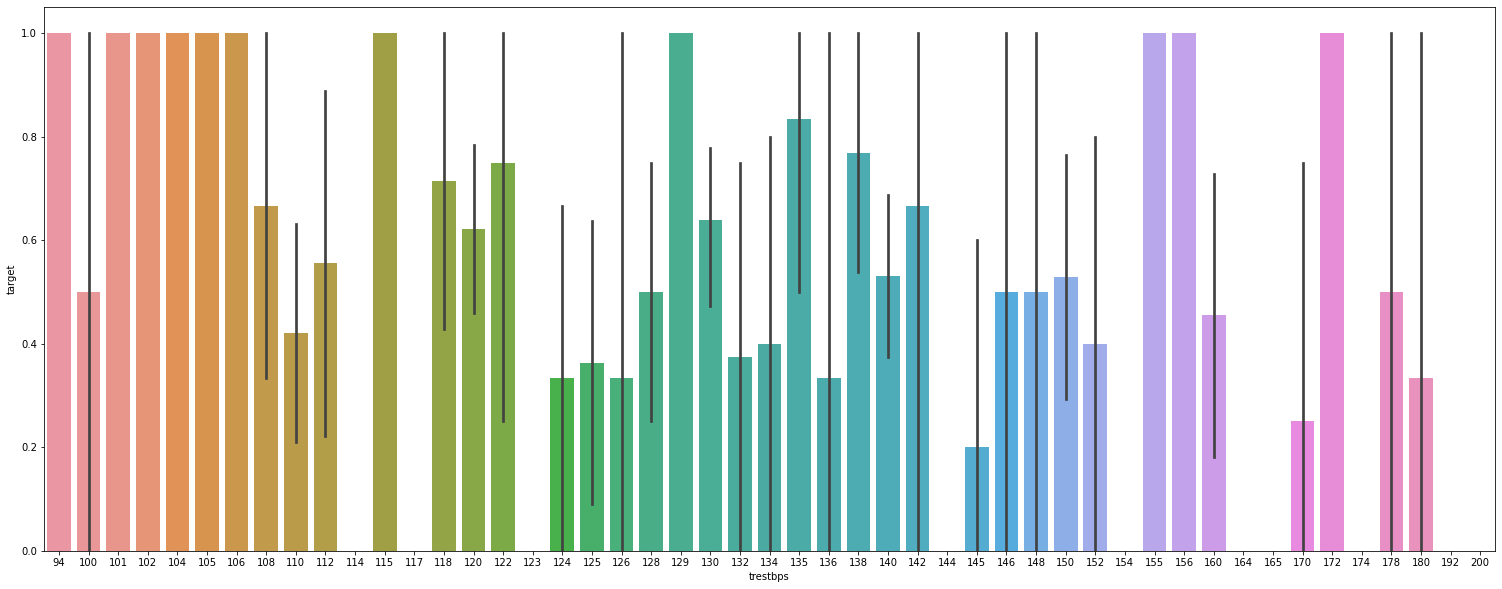

In [20]:
plt.figure(figsize=(26, 10))
sns.barplot(data["trestbps"],y)

In [22]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

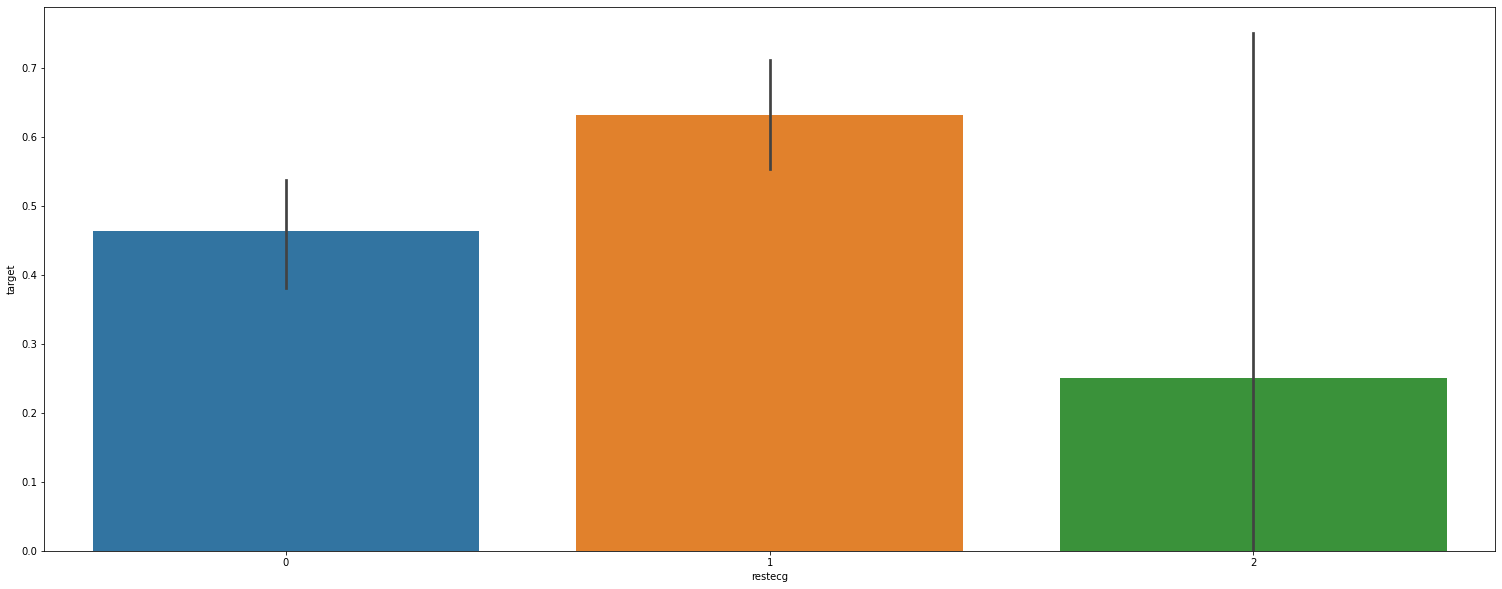

In [24]:
plt.figure(figsize=(26, 10))
sns.barplot(data["restecg"],y)

In [25]:
data["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

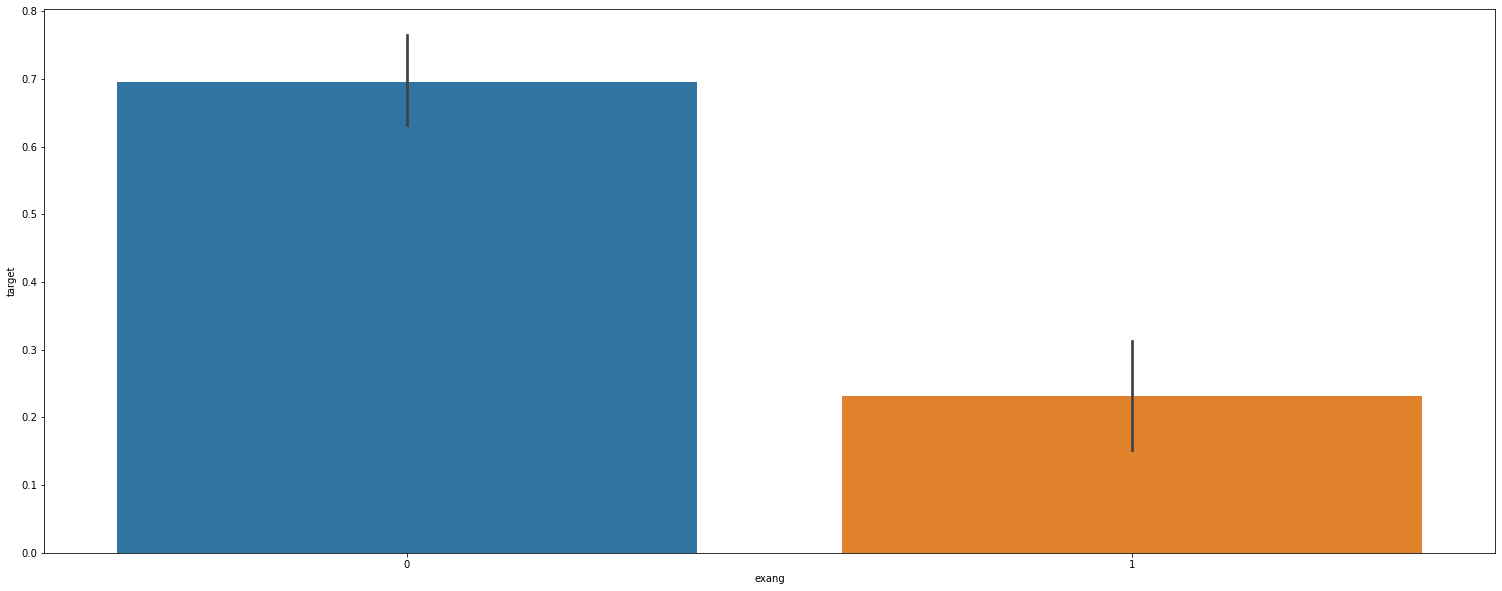

In [26]:
plt.figure(figsize=(26, 10))
sns.barplot(data["exang"],y)

In [27]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

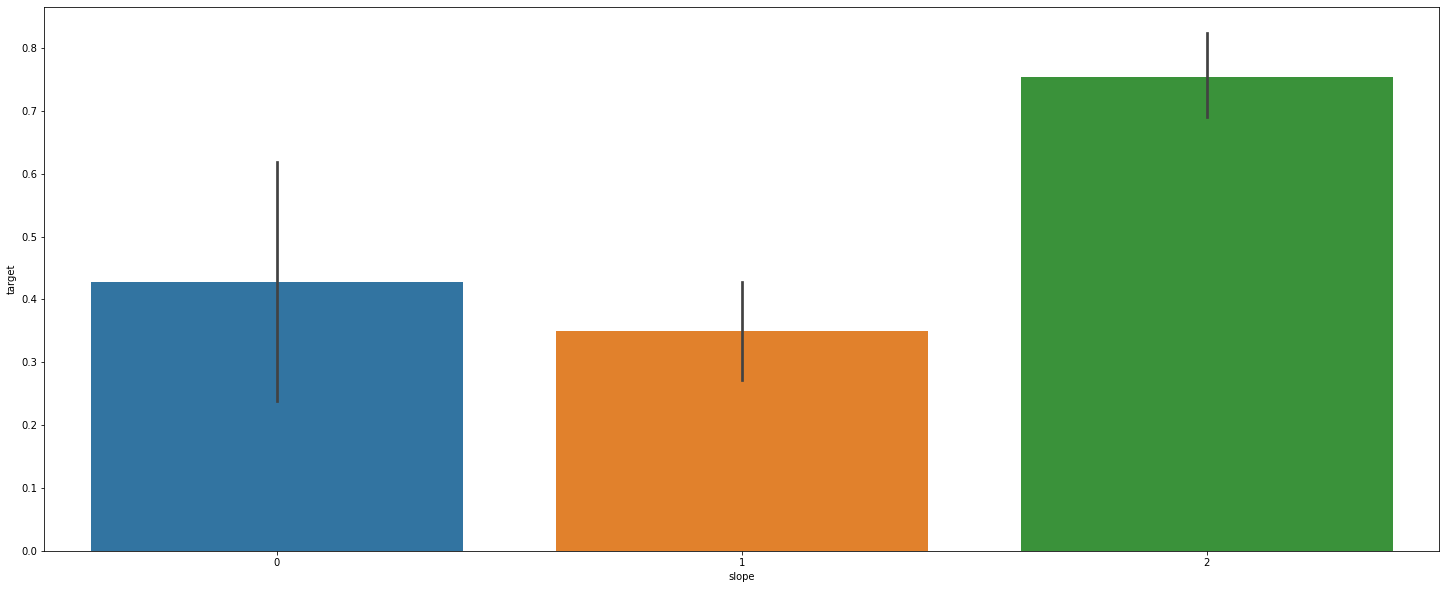

In [28]:
plt.figure(figsize=(25, 10))
sns.barplot(data["slope"],y)

# 4. Train Test dataset split

In [41]:
from sklearn.model_selection import train_test_split

predictors =data.drop("target",axis=1)
target =data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
     format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [42]:
X_train.shape

(242, 13)

In [43]:
X_test.shape

(61, 13)

In [44]:
Y_train.shape

(242,)

In [23]:
Y_test.shape

(61,)

In [45]:
#Importing Accuracy Score
from sklearn.metrics import accuracy_score

# 5. Model Fitting

# # Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [25]:
#model : Algorithm performance testing using Confusion matrix, Precision Score, Recall, F-Score

In [26]:
#Models: Support Vector Machine(SVM), Logistic Regression(LR), K-Nearest Neighbors, naive Bayes, Random Forest

In [46]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# 1. LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [48]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [49]:
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 85.12%
Test accuracy: 85.25%


In [31]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization,'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9344262295081968

CONFUSION MATRIX

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<AxesSubplot:>

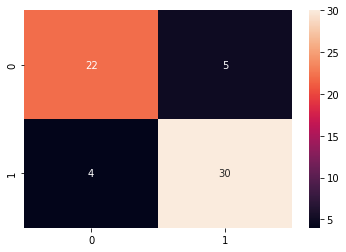

In [34]:
sns.heatmap(matrix,annot = True, fmt = "d")
#FMT = D IS FORMAT = DEFAULT

PRECISION SCORE

In [35]:
from sklearn.metrics import precision_score

In [36]:
precision = precision_score(Y_test, y_pred_lr)

In [37]:
print("Precision: ",precision)

Precision:  0.8571428571428571


RECALL

In [38]:
from sklearn.metrics import recall_score

In [39]:
recall = recall_score(Y_test, y_pred_lr)

In [40]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


F-SCORE

In [41]:
#balance of precision and recall score
print((2*precision*recall)/(precision+recall))

0.8695652173913043


In [42]:
#cm using bad style
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [43]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [44]:
#False Negative rate of the model
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# 2. RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


Learning curve for Training score & cross validation score

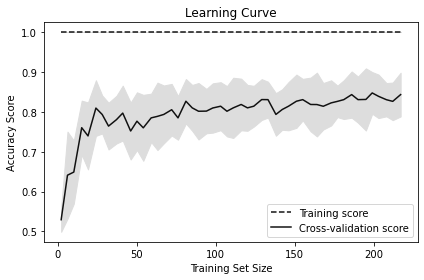

In [46]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [47]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [48]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


In [49]:
#Pruning ddepth of the trees and checking accuracy
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

CONFUSION MATRIX

In [50]:
from sklearn.metrics import confusion_matrix

In [52]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<AxesSubplot:>

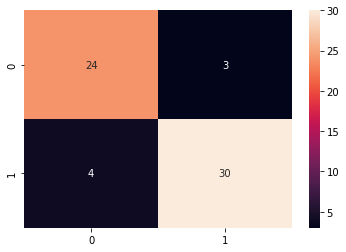

In [53]:
sns.heatmap(matrix,annot = True, fmt = "d")

PRECISION SCORE

In [55]:
from sklearn.metrics import precision_score

In [56]:
precision = precision_score(Y_test, y_pred_rf)

In [57]:
print("Precision: ",precision)

Precision:  0.9090909090909091


RECALL

In [62]:
from sklearn.metrics import recall_score

In [63]:
recall = recall_score(Y_test, y_pred_rf)

In [65]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


F SCORE

In [66]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


In [67]:
#CM USING BAD STYLE
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [68]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [69]:
#FALSE NEGATIVE RATE
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# 3. NAIVE BAYES

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [71]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [72]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


CONFUSION MATRIX

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<AxesSubplot:>

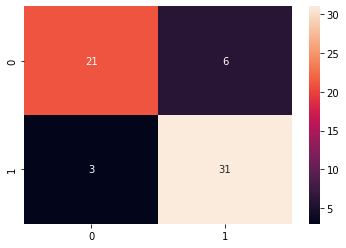

In [76]:
sns.heatmap(matrix,annot = True, fmt = "d")

PRECISION SCORE

In [77]:
from sklearn.metrics import precision_score

In [78]:
precision = precision_score(Y_test, y_pred_nb)

In [79]:
print("Precision: ",precision)

Precision:  0.8378378378378378


RECALL

In [81]:
recall = recall_score(Y_test, y_pred_nb)

In [82]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


F_SCORE

In [83]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


In [84]:
#BAD CM STYLE
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [85]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [86]:
#FALSE NEGATIVE RATE OF THE MODEL
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# 4. KNN(K NEAREST NEIGHBORS)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [88]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [89]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [90]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 59.02%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It turns out that value of n_neighbours (8) is optimal.

CONFUSION MATRIX

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<AxesSubplot:>

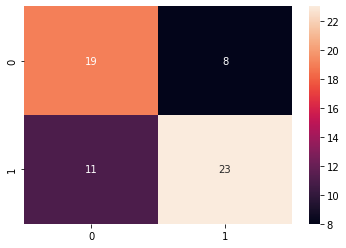

In [93]:
sns.heatmap(matrix,annot = True, fmt = "d")

PRECISION SCORE

In [94]:
from sklearn.metrics import precision_score

In [95]:
precision = precision_score(Y_test, y_pred_knn)

In [96]:
print("Precision: ",precision)

Precision:  0.7419354838709677


RECALL

In [98]:
from sklearn.metrics import recall_score

In [99]:
recall = recall_score(Y_test, y_pred_knn)

In [100]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


F_SCORE

In [101]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


In [102]:
#BAD CM STYLE
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [104]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [105]:
#FALSE NEGATIVE RATE OF THE MODEL
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# 5. SVM(SUPPORT VECTOR MACHINE)

In [155]:
from sklearn import svm
from sklearn.svm import LinearSVC

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

print(Y_pred_svm)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [156]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
matrix= confusion_matrix(Y_test, Y_pred_svm)

<AxesSubplot:>

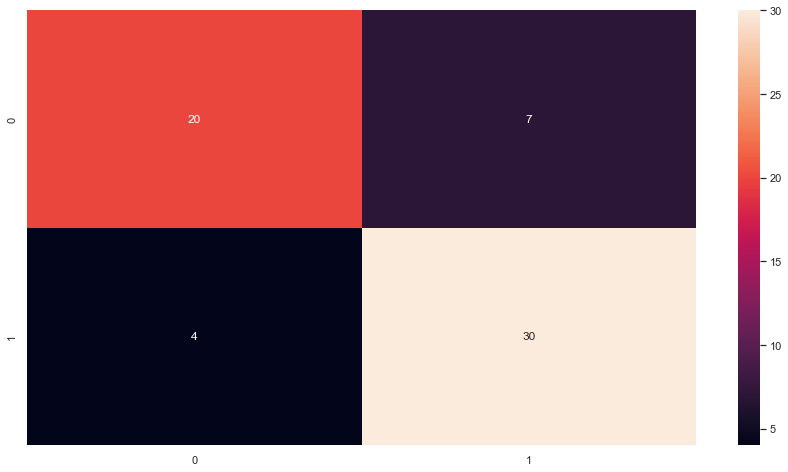

In [159]:
sns.heatmap(matrix,annot = True, fmt = "d")

PRECISION SCORE

In [160]:
from sklearn.metrics import precision_score

In [161]:
precision = precision_score(Y_test, Y_pred_svm)

In [162]:
print("Precision: ",precision)

Precision:  0.8108108108108109


RECALL

In [163]:
from sklearn.metrics import recall_score

In [164]:
recall = recall_score(Y_test, Y_pred_svm)

In [165]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


F_SCORE

In [166]:
print((2*precision*recall)/(precision+recall))

0.8450704225352113


In [167]:
#BAD CM STYLE
CM = pd.crosstab(Y_test, Y_pred_svm)
CM

col_0,0,1
target,,
0,20,7
1,4,30


In [168]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

FALSE NEGATIVE RATE

In [169]:
fnr = FN*100/(FN+TP)
fnr

11.764705882352942

___________________________________________________________________________
F1 score
___________________________________________________________________________

LOGISTIC REGRESSION: 0.87

RANDOM FOREST: 0.89

NAIVE BAYES: 0.87

KNN: 0.707

SVM: 0.84

# FINAL SCORE

In [170]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'SVM', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), LinearSVC(random_state=0, tol=1e-05), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [171]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.688525
SVM,0.459016
Logistic Regression,0.852459
Naive Bayes,0.852459
Random Forests,0.885246


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

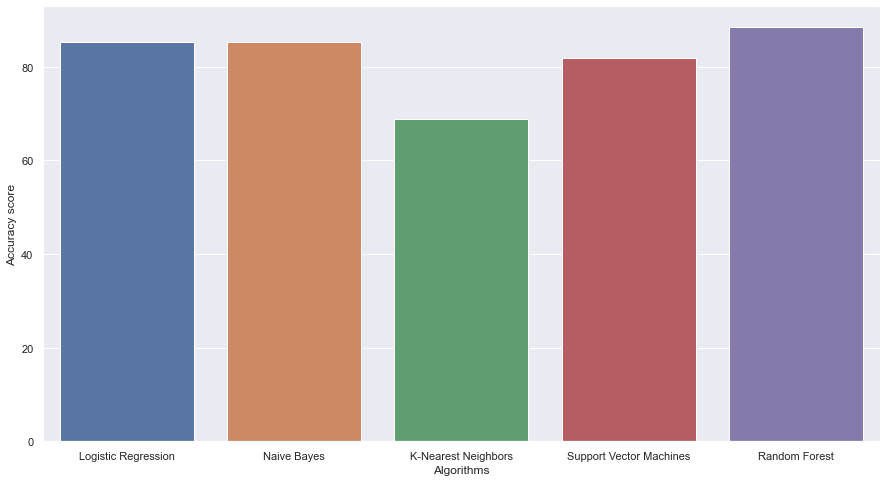

In [172]:
scores = [score_lr,score_nb,score_knn,score_svm,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Support Vector Machines","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)